In [1]:
import json
import os
import matplotlib.pyplot as plt
import cv2
from collections import defaultdict

In [3]:
coco_path = "/home/minyong-voyagerx/Mignon/Min/bb-detection/data/train_annotations.json"

with open(coco_path, 'r') as f:
    ann_json = json.load(f)

## EDA 분석 결과
1. Box의 개수는 많아봤자 최대 2개 (물론 Test Dataset에서는 몇개 등장할지 예측하기 어려움)
    - 알다시피 box는 사실 많으면 많을 수록 좋은 결과가 나오는 것이 mAP
2. Train dataset의 box class의 분포: [38958, 9760, 12002, 19498]
3. Width, Height 분포
    - 모두 1:1 비율로 존재
    - 576 * 576 -> 58155
    - 320 * 320 -> 4467

In [4]:
result = [0] * 4
img_box = defaultdict(int)

for ann in ann_json["annotations"]:
    result[ann["category_id"] - 1] += 1
    img_box[ann["image_id"]] += 1

print("Each class box distribution: ", result)
print("Total box number: ", sum(result))
print("Max box count for each image: ", max(img_box.items(), key=lambda x: x[1])[1])

Each class box distribution:  [38958, 9760, 12002, 19498]
Total box number:  80218
Max box count for each image:  2


In [5]:
img_box = defaultdict(int)
for ann in ann_json["images"]:
    if ann["width"] != ann["height"]:
        print("different...!")

    img_box[ann["width"]] += 1

img_box

defaultdict(int, {576: 58155, 320: 4467})

# Visualization

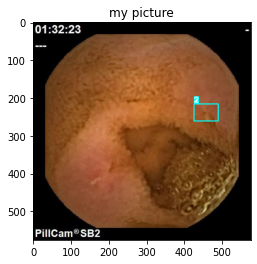

In [12]:
image = cv2.imread("../data/test/test_200001.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
label = "2"
x1, y1, x2, y2 = map(round, [425.288818, 216.219574, 489.211975, 261.443298])

cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 255), 2)
(tw, th), _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_COMPLEX, 0.6, 1)
cv2.rectangle(image, (x1, y1-20), (x1+tw, y1), (0, 255, 255), -1)
cv2.putText(image, label, (x1, y1-5), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)

plt.imshow(image)
plt.title('my picture')
plt.show()